In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/shai-ml/sample_submission.csv
/kaggle/input/shai-ml/train.csv
/kaggle/input/shai-ml/test.csv


# Import Library

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn. linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics 

In [3]:
%config Completer.use_jedi = False

In [4]:
train_df = pd.read_csv("../input/shai-ml/train.csv")
train_df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
5,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
6,11,0.30,Good,J,SI1,64.0,55.0,339,4.25,4.28,2.73
7,13,0.22,Premium,F,SI1,60.4,61.0,342,3.88,3.84,2.33
8,14,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71
9,15,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27


In [34]:
test_df = pd.read_csv("../input/shai-ml/test.csv")
test_df.head(10)
test2 = test_df.copy()

# About Dataset
# Context
* This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.
* 
* Content price price in US dollars (\$326--\$18,823)
* 
* carat weight of the diamond (0.2--5.01)
* 
* cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* 
* color diamond colour, from J (worst) to D (best)
* 
* clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* 
* x length in mm (0--10.74)
* 
* y width in mm (0--58.9)
* 
* z depth in mm (0--31.8)
* 
* depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
* 
* table width of top of diamond relative to widest point (43--95)

In [6]:
# Checking for missing values and categorical variables in the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43040 entries, 0 to 43039
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  43040 non-null  int64  
 1   carat       43040 non-null  float64
 2   cut         43040 non-null  object 
 3   color       43040 non-null  object 
 4   clarity     43040 non-null  object 
 5   depth       43040 non-null  float64
 6   table       43040 non-null  float64
 7   price       43040 non-null  int64  
 8   x           43040 non-null  float64
 9   y           43040 non-null  float64
 10  z           43040 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


### **<span style="color:#682F2F;">Note: </span>**
##### There are 43040  non-null values in all the attributes thus no missing values.
##### Datatype of features 'cut', 'color' & 'clarity' is "object" which needs to be converted into numerical variable (will be done in data preprocessing) before we feed the data to algorithms. 

### **<span style="color:#682F2F;"><center>Data Types</center></span>**

In [7]:
# Column name Unnamed:0 isn't avalid colmun. , so we will drop it

train_df.drop('Unnamed: 0', axis=1, inplace=True)
train_df = train_df[train_df['x']!=0]
train_df = train_df[train_df['y']!=0]
train_df = train_df[train_df['z']!=0]

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43023 entries, 0 to 43039
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43023 non-null  float64
 1   cut      43023 non-null  object 
 2   color    43023 non-null  object 
 3   clarity  43023 non-null  object 
 4   depth    43023 non-null  float64
 5   table    43023 non-null  float64
 6   price    43023 non-null  int64  
 7   x        43023 non-null  float64
 8   y        43023 non-null  float64
 9   z        43023 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.6+ MB


In [9]:
train_df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

### **<span style="color:#682F2F;"><center>Exploratory Data Analysis</center></span>**

In [10]:
train_df.describe()

,carat,depth,table,price,x,y,z
count,43023.000000,43023.000000,43023.000000,43023.000000,43023.000000,43023.000000,43023.000000
mean,0.796685,61.746194,57.439135,3940.751807,5.724874,5.728482,3.535764
std,0.481183,1.434901,2.239621,4021.138491,1.129919,1.157478,0.711221
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.380000,61.000000,56.000000,939.500000,4.660000,4.670000,2.870000
50%,0.710000,61.800000,57.000000,2387.000000,5.710000,5.720000,3.530000
75%,1.030000,62.500000,59.000000,5306.000000,6.500000,6.500000,4.020000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### **<span style="color:#682F2F;">Note: </span>**
#### "Price" as expected is right skewed, having more number of data points in left
#### Under dimensional features of 'x', 'y' & 'z' - min value is 0 thus making such datapoints either a 1D or 2D diamond object which doesn't make much sense - so needs either to be imputed with appropriate value or dropped altogether.
#### so we make this in above
* train_df = train_df[train_df['x']!=0]
* train_df = train_df[train_df['y']!=0]
* train_df = train_df[train_df['z']!=0]


Text(0.5, 1.0, 'Theme for EDA')

<Figure size 432x288 with 0 Axes>

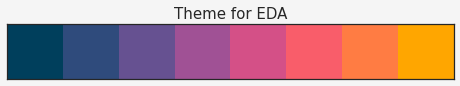

In [11]:
colors=['#003f5c','#2f4b7c','#665191','#a05195','#d45087','#f95d6a','#ff7c43','#ffa600']
sns.set(palette=colors, font='San', style='white', rc={'axes.facecolor':'whitesmoke', 'figure.facecolor':'whitesmoke'})
sns.despine(left=False, right=False)
sns.palplot(colors)
plt.title("Theme for EDA", family='Sherif', size=15, weight=50)

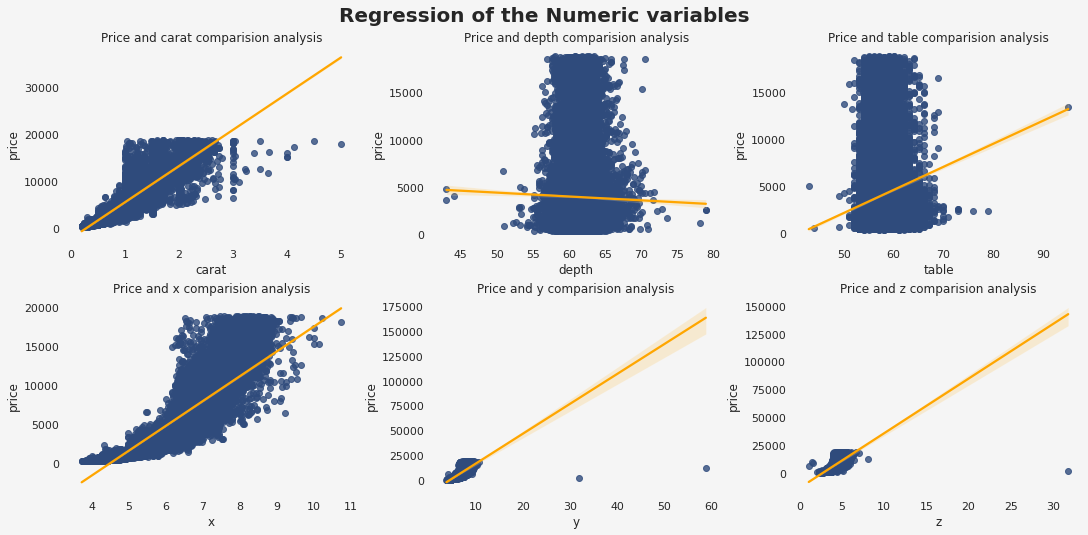

In [12]:
int_cols = train_df.select_dtypes(exclude='object').columns.to_list()
#print(int_cols)
int_cols.remove('price')
j=0
fig=plt.figure(figsize=(15,10), constrained_layout =True)
plt.suptitle("Regression of the Numeric variables", family='Sherif', size=20, weight='bold')
for i in int_cols:
    ax=plt.subplot(331+j)
    #ax.set_title('Title')
    #print(df[i])
    ax=sns.regplot(data=train_df, x=i, y='price', color=colors[1], line_kws={'color':'#ffa600'})
    ax.set_title("Price and {} comparision analysis".format(i), family='Sherif')
    for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)
    
    j=j+1

    

**Above chart shows the linear relationship with the Target variable, however, there are outliers**

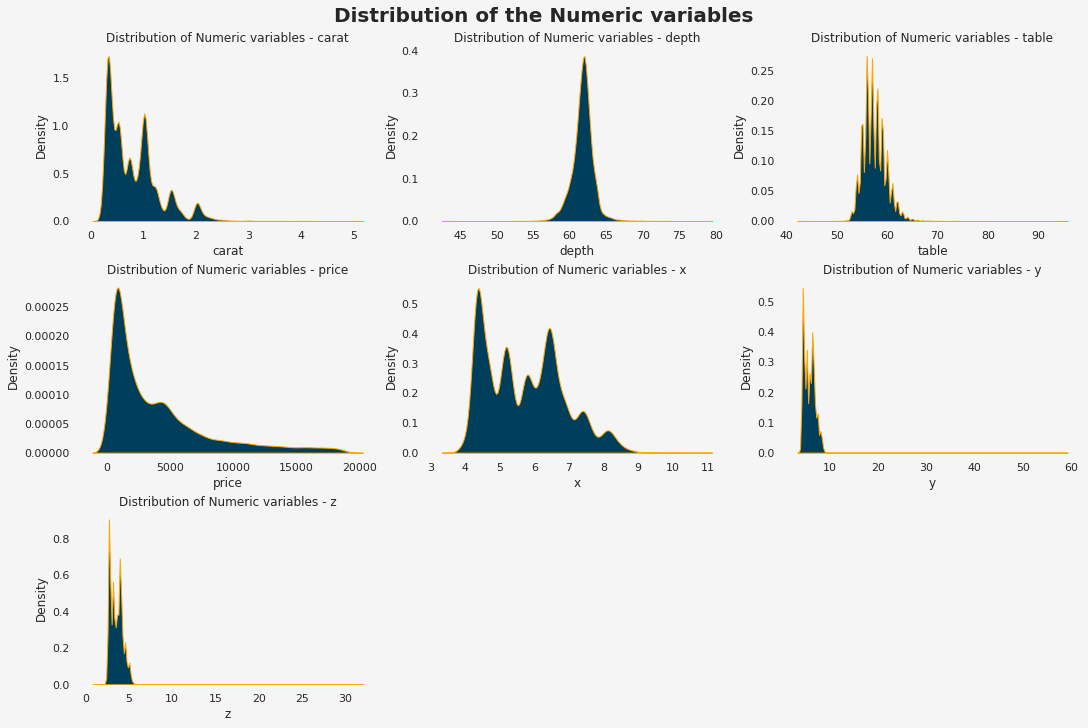

In [13]:
# let us find the distribution of integer variables
int_cols = train_df.select_dtypes(exclude='object').columns.to_list()
j=0
fig=plt.figure(figsize=(15,10), constrained_layout =True)
plt.suptitle("Distribution of the Numeric variables", family='Sherif', size=20, weight='bold')
for i in int_cols:
    ax=plt.subplot(331+j)
    #ax.set_title('Title')
    #print(df[i])
    ax=sns.kdeplot(data=train_df, x=i, color=colors[0], fill=True, edgecolor=colors[-1], alpha=1)
    ax.set_title("Distribution of Numeric variables - {}".format(i), family='Sherif')
    for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)
    
    j=j+1

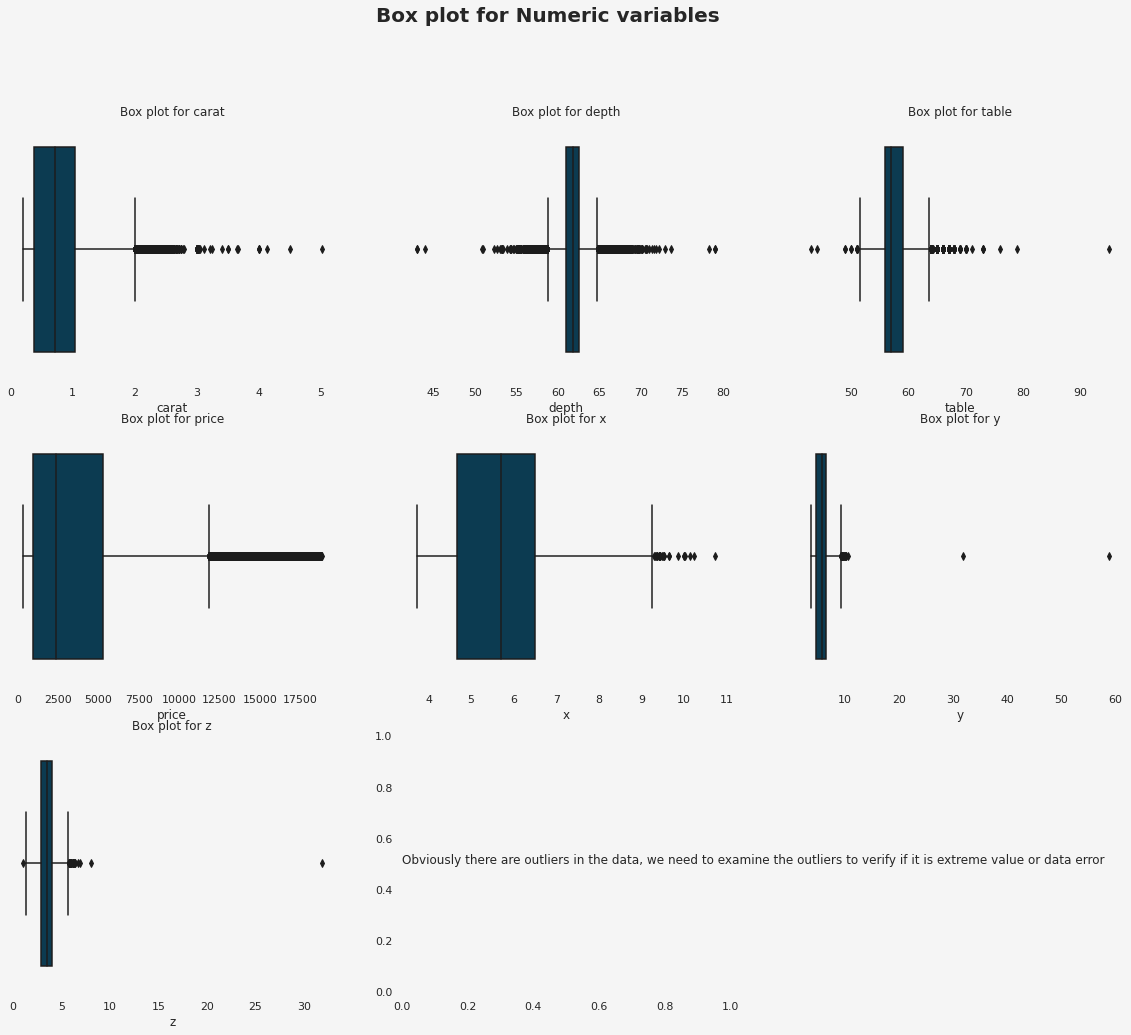

In [14]:
j=0
fig=plt.figure(figsize=(20,16))
plt.suptitle("Box plot for Numeric variables", family='Sherif', size=20, weight='bold')
for i in int_cols:
    ax=plt.subplot(331+j)
    #ax.set_title('Title')
    #print(df[i])
    ax=sns.boxplot(data=train_df, x=i,color=colors[0])
    ax.set_title("Box plot for {}".format(i))
    for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)
    j=j+1
ax=plt.subplot(331+j)
ax.text(x=0,y=0.5, s='Obviously there are outliers in the data, we need to examine the outliers to verify if it is extreme value or data error')
for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)

# Now, we will check test data

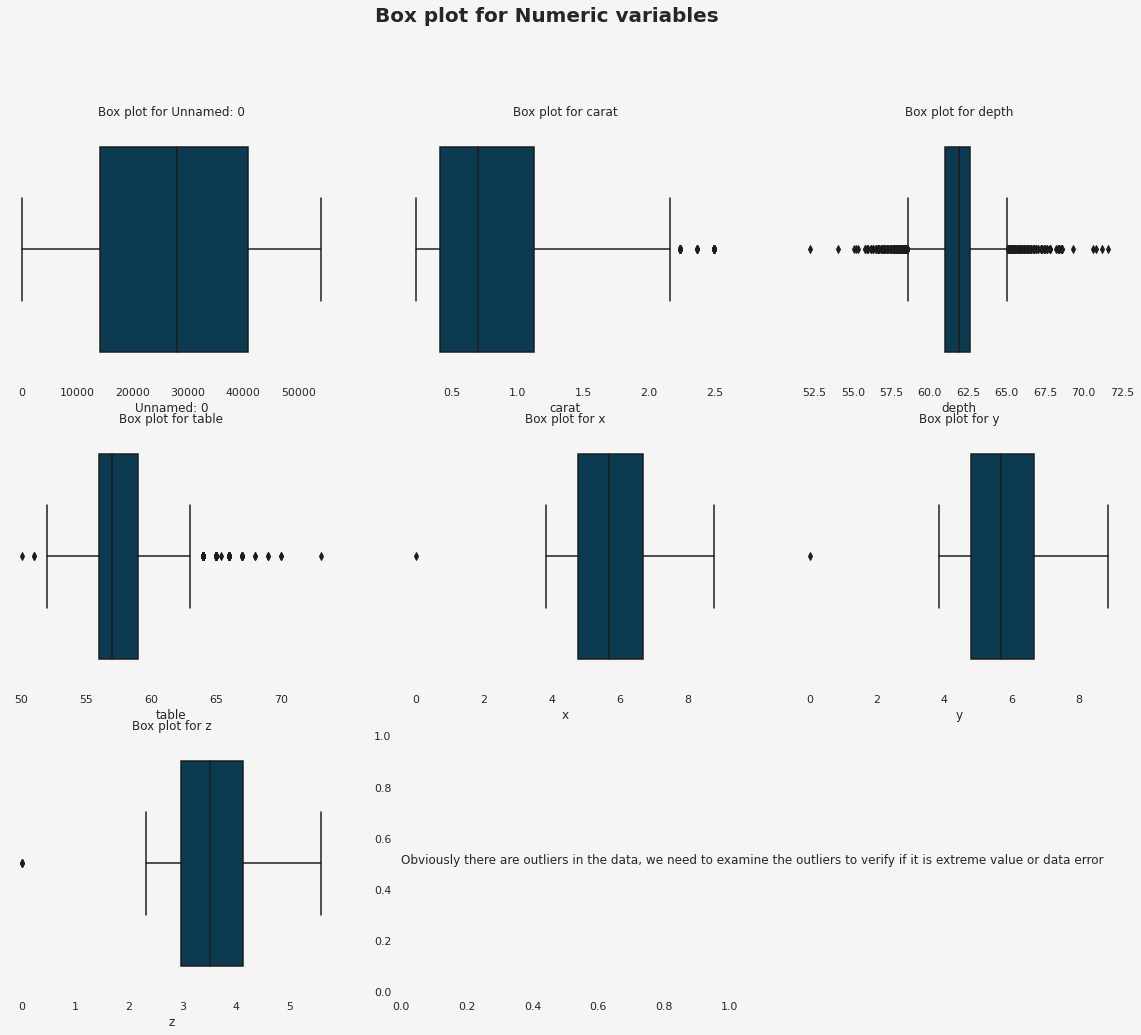

In [15]:
int_cols2 = test_df.select_dtypes(exclude='object').columns.to_list()

j=0
fig=plt.figure(figsize=(20,16))
plt.suptitle("Box plot for Numeric variables", family='Sherif', size=20, weight='bold')
for i in int_cols2:
    ax=plt.subplot(331+j)
    #ax.set_title('Title')
    #print(df[i])
    ax=sns.boxplot(data=test_df, x=i,color=colors[0])
    ax.set_title("Box plot for {}".format(i))
    for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)
    j=j+1
ax=plt.subplot(331+j)
ax.text(x=0,y=0.5, s='Obviously there are outliers in the data, we need to examine the outliers to verify if it is extreme value or data error')
for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)

### **<span style="color:#682F2F;"><center>DATA PREPROCESSING</center></span>**

# Data cleaning

In [16]:
test_df.drop('Unnamed: 0', axis=1, inplace=True)
test_df = test_df[test_df['x']!=0]
test_df = test_df[test_df['y']!=0]
test_df = test_df[test_df['z']!=0]

### **<span style="color:#682F2F;">Removing Outliers for train data: </span>**


In [17]:
# Dropping the outliers (since we have huge dataset) by defining appropriate measures across features 
# Remove Outlier

def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    print("Q1 = ", Q1, " Q3 = ", Q3, " IQR = ", IQR)
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

# Extract all column names as list in Pandas Dataframe
lst_all_cols = train_df.columns.tolist()
print("lst_all_cols : \n",lst_all_cols)

print("\n")
# Numerical data distribution
print(list(set(train_df.dtypes.tolist())))
df_num = train_df.select_dtypes(include = ["float64", "int64"])
lst_num_cols = df_num.columns.tolist()
print("Numerical Data : \n",lst_num_cols)
print("\n")


indx = 0
for col in lst_num_cols:
    print(indx)
    lower_range, upper_range =  remove_outlier(train_df[col])
    train_df[col] = np.where(train_df[col] < lower_range, lower_range, train_df[col]) 
    train_df[col] = np.where(train_df[col] > upper_range, upper_range, train_df[col])
    indx = indx +1
    print("-----------------------------")


lst_all_cols : 
 ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']


[dtype('float64'), dtype('O'), dtype('int64')]
Numerical Data : 
 ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']


0
Q1 =  0.38  Q3 =  1.03  IQR =  0.65
-----------------------------
1
Q1 =  61.0  Q3 =  62.5  IQR =  1.5
-----------------------------
2
Q1 =  56.0  Q3 =  59.0  IQR =  3.0
-----------------------------
3
Q1 =  939.5  Q3 =  5306.0  IQR =  4366.5
-----------------------------
4
Q1 =  4.66  Q3 =  6.5  IQR =  1.8399999999999999
-----------------------------
5
Q1 =  4.67  Q3 =  6.5  IQR =  1.83
-----------------------------
6
Q1 =  2.87  Q3 =  4.02  IQR =  1.1499999999999995
-----------------------------


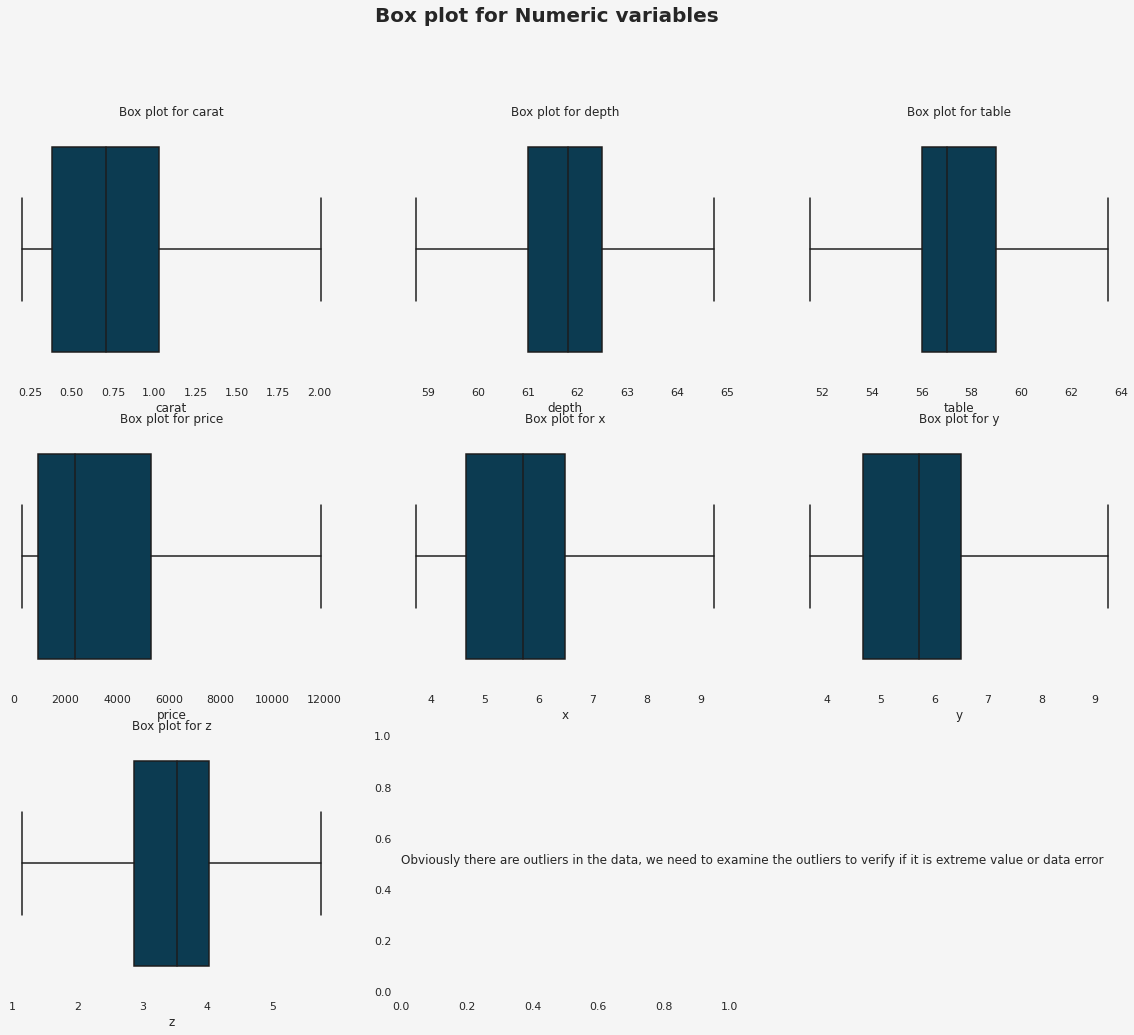

In [18]:
j=0
fig=plt.figure(figsize=(20,16))
plt.suptitle("Box plot for Numeric variables", family='Sherif', size=20, weight='bold')
for i in int_cols:
    ax=plt.subplot(331+j)
    #ax.set_title('Title')
    #print(df[i])
    ax=sns.boxplot(data=train_df, x=i,color=colors[0])
    ax.set_title("Box plot for {}".format(i))
    for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)
    j=j+1
ax=plt.subplot(331+j)
ax.text(x=0,y=0.5, s='Obviously there are outliers in the data, we need to examine the outliers to verify if it is extreme value or data error')
for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)

### **<span style="color:#682F2F;">Removing Outliers for test data: </span>**


In [19]:
# Dropping the outliers (since we have huge dataset) by defining appropriate measures across features 
# Remove Outlier

def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    print("Q1 = ", Q1, " Q3 = ", Q3, " IQR = ", IQR)
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

# Extract all column names as list in Pandas Dataframe
lst_all_cols = test_df.columns.tolist()
print("lst_all_cols : \n",lst_all_cols)

print("\n")
# Numerical data distribution
print(list(set(test_df.dtypes.tolist())))
df_num = test_df.select_dtypes(include = ["float64", "int64"])
lst_num_cols = df_num.columns.tolist()
print("Numerical Data : \n",lst_num_cols)
print("\n")


indx = 0
for col in lst_num_cols:
    print(indx)
    lower_range, upper_range =  remove_outlier(train_df[col])
    test_df[col] = np.where(test_df[col] < lower_range, lower_range, test_df[col]) 
    test_df[col] = np.where(test_df[col] > upper_range, upper_range, test_df[col])
    indx = indx +1
    print("-----------------------------")


lst_all_cols : 
 ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']


[dtype('float64'), dtype('O')]
Numerical Data : 
 ['carat', 'depth', 'table', 'x', 'y', 'z']


0
Q1 =  0.38  Q3 =  1.03  IQR =  0.65
-----------------------------
1
Q1 =  61.0  Q3 =  62.5  IQR =  1.5
-----------------------------
2
Q1 =  56.0  Q3 =  59.0  IQR =  3.0
-----------------------------
3
Q1 =  4.66  Q3 =  6.5  IQR =  1.8399999999999999
-----------------------------
4
Q1 =  4.67  Q3 =  6.5  IQR =  1.83
-----------------------------
5
Q1 =  2.87  Q3 =  4.02  IQR =  1.1499999999999995
-----------------------------


### **<span style="color:#682F2F;">Encoding Categorical Variable: </span>**



In [20]:
# Making a copy to keep original data in its form intact
data1 = train_df.copy()

# Applying label encoder to columns with categorical data
columns = ['cut','color','clarity']
label_encoder = LabelEncoder()
for col in columns:
    data1[col] = label_encoder.fit_transform(data1[col])
data1.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,43023.000000,43023.000000,43023.000000,43023.000000,43023.000000,43023.000000,43023.000000,43023.000000,43023.000000,43023.000000
mean,0.790795,2.543756,2.587337,3.831997,61.746066,57.420738,3727.835954,5.724655,5.726621,3.534911
std,0.462625,1.021586,1.703619,1.716601,1.267157,2.165031,3436.667463,1.129164,1.121340,0.697158
min,0.200000,0.000000,0.000000,0.000000,58.750000,51.500000,326.000000,3.730000,3.680000,1.145000
25%,0.380000,2.000000,1.000000,2.000000,61.000000,56.000000,939.500000,4.660000,4.670000,2.870000
50%,0.710000,2.000000,3.000000,4.000000,61.800000,57.000000,2387.000000,5.710000,5.720000,3.530000
75%,1.030000,3.000000,4.000000,5.000000,62.500000,59.000000,5306.000000,6.500000,6.500000,4.020000
max,2.005000,4.000000,6.000000,7.000000,64.750000,63.500000,11855.750000,9.260000,9.245000,5.745000


### **<span style="color:#682F2F;">Note: </span>**
##### As categorical features have been converted into numerical columns, we are getting 5-point summary along with count, mean & std for them as well. 
##### Now, we may analyze correlation matrix after getting done with pre-processing for possible feature selection in order to make our dataset more cleaner, optimal before we feed it into algorithm.

In [56]:
# Making a copy to keep original data in its form intact
data2 = test_df.copy()

# Applying label encoder to columns with categorical data
columns = ['cut','color','clarity']
label_encoder = LabelEncoder()
for col in columns:
    data2[col] = label_encoder.fit_transform(data2[col])
data2.describe()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
count,10900.000000,10900.000000,10900.000000,10900.000000,10900.000000,10900.000000,10900.000000,10900.000000,10900.000000,10900.000000
mean,27806.405688,0.801794,2.589908,2.620275,3.849266,61.762532,57.526844,5.757932,5.759811,3.555975
std,15880.940837,0.443401,1.050644,1.691755,1.755527,1.422198,2.210543,1.077961,1.069891,0.669389
min,1.000000,0.230000,0.000000,0.000000,0.000000,52.200000,50.100000,0.000000,0.000000,0.000000
25%,14044.500000,0.410000,2.000000,1.000000,2.000000,61.000000,56.000000,4.790000,4.800000,2.970000
50%,27911.500000,0.700000,2.000000,3.000000,4.000000,61.900000,57.000000,5.680000,5.690000,3.520000
75%,40898.250000,1.130000,3.000000,4.000000,5.000000,62.600000,59.000000,6.700000,6.690000,4.130000
max,53938.000000,2.500000,4.000000,6.000000,7.000000,71.600000,73.000000,8.800000,8.890000,5.580000


In [57]:
data2.shape

(10900, 10)

<AxesSubplot:>

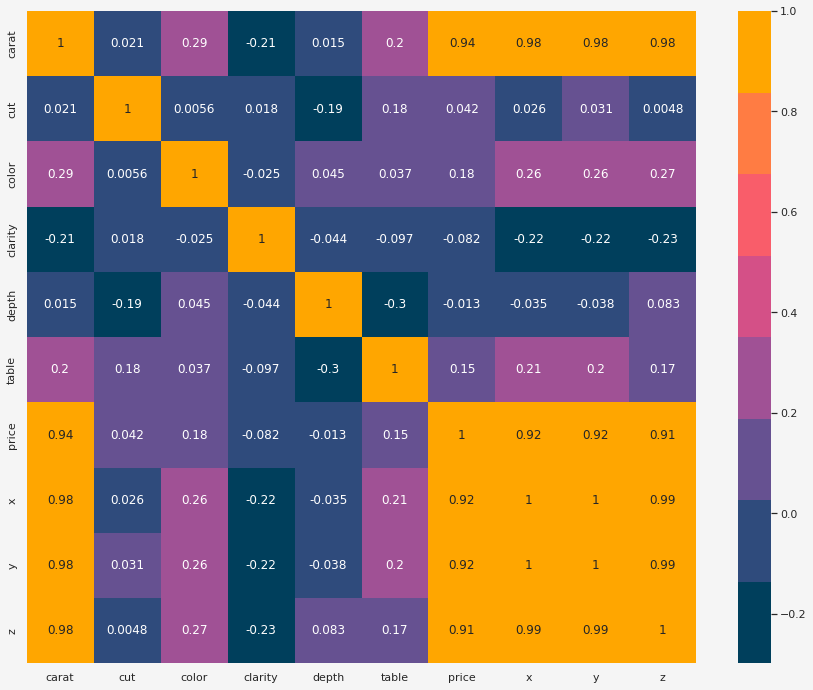

In [22]:
# Examining correlation matrix using heatmap
cmap = sns.diverging_palette(205, 133, 63, as_cmap=True)
# cols = (["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
corrmat= data1.corr()
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corrmat,cmap=colors,annot=True)

### **<span style="color:#682F2F;">Note: </span>**
##### Features "carat", "x", "y", "z" are highly correlated to our target variable, price. 
##### Features "cut", "clarity", "depth" are very low correlated (<|0.1|) thus may be removed though due to presence of only few selected features, we won't be doing that.

In [23]:
X_train = data1.drop(["price"], axis=1)
y_train = data1["price"]
test = data2

In [24]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr",LinearRegression())])

pipeline_lasso=Pipeline([("scalar2", StandardScaler()),
                      ("lasso",Lasso())])

pipeline_dt=Pipeline([("scalar3",StandardScaler()),
                     ("dt",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar4",StandardScaler()),
                     ("rf",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar5",StandardScaler()),
                     ("kn",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar6",StandardScaler()),
                     ("xgb",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_lasso, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipeline_dict = {0: "LinearRegression", 1: "Lasso", 2: "DecisionTree", 3: "RandomForest",4: "KNeighbors", 5: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [25]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=12)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipeline_dict[i], -1 * cv_score.mean()))

LinearRegression: 992.929237 
Lasso: 995.245745 
DecisionTree: 683.829590 
RandomForest: 524.078884 
KNeighbors: 767.161011 
XGBRegressor: 461.136477 


# Model prediction on test data with XGBClassifier which gave us the least RMSE 

In [61]:
test = data2.copy()

test = data2.drop('Unnamed: 0',axis=1)


In [63]:
pred = pipeline_xgb.predict(test)
# first_col = list(test2['Unnamed: 0'])
# price = list(pred)
# sub = pd.DataFrame({'Unnamed: 0':first_col,'price':price})
# sub.to_csv('submission.csv',index = False)
pred

array([ 300.09027,  418.80206,  312.09518, ..., 2915.985  , 2869.5178 ,
       2696.3215 ], dtype=float32)

In [64]:
len(pred)

10900

In [66]:
sub = pd.read_csv('../input/shai-ml/sample_submission.csv')
submission = pd.DataFrame()
submission['Unnamed: 0'] = sub['Unnamed: 0']
submission['Price'] = pred.reshape((pred.shape[0]))
submission.to_csv('submission.csv', index=False)